<a href="https://colab.research.google.com/github/MargeTao/PRODIGY_ML_TASK2/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-14de8b308eef>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_features['Gender'] = customer_features['Gender'].map({'Male': 0, 'Female': 1})


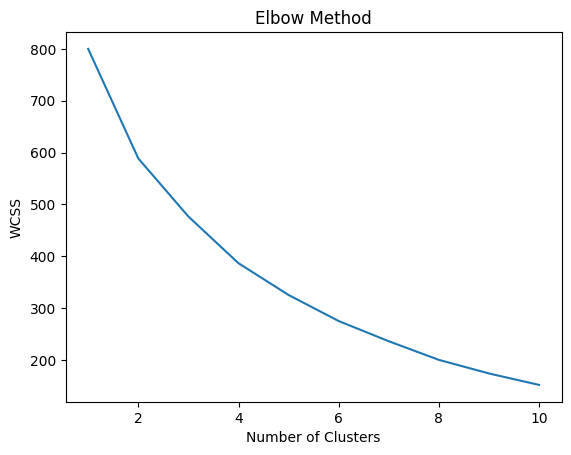


Cluster 0 Characteristics:
CustomerID                92.560606
Age                       45.075758
Annual Income (k$)        57.727273
Spending Score (1-100)    36.181818
Cluster                    0.000000
dtype: float64

Cluster 1 Characteristics:
CustomerID                104.364706
Age                        28.047059
Annual Income (k$)         61.788235
Spending Score (1-100)     72.882353
Cluster                     1.000000
dtype: float64

Cluster 2 Characteristics:
CustomerID                104.489796
Age                        49.204082
Annual Income (k$)         62.244898
Spending Score (1-100)     29.734694
Cluster                     2.000000
dtype: float64


<ipython-input-2-14de8b308eef>:49: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df[df['Cluster'] == cluster].mean())
<ipython-input-2-14de8b308eef>:49: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df[df['Cluster'] == cluster].mean())
<ipython-input-2-14de8b308eef>:49: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your own dataset from a CSV file
file_path = '/content/Mall_Customers.csv'  # Replace with the actual name of your CSV file
df = pd.read_csv('/content/Mall_Customers.csv')

# Assuming your dataset has columns for customer features
# Adjust the column names based on your actual dataset
customer_features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Convert 'Gender' to numerical values (if needed)
customer_features['Gender'] = customer_features['Gender'].map({'Male': 0, 'Female': 1})

# Standardize the features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(customer_features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# Based on the elbow method, choose the optimal number of clusters
optimal_num_clusters = 3  # Adjust this based on the elbow method plot

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
customer_clusters = kmeans.fit_predict(customer_features_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = customer_clusters

# Explore the characteristics of each cluster
for cluster in range(optimal_num_clusters):
    print(f"\nCluster {cluster} Characteristics:")
    print(df[df['Cluster'] == cluster].mean())


